<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [31]:
import keras
keras.__version__
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [32]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

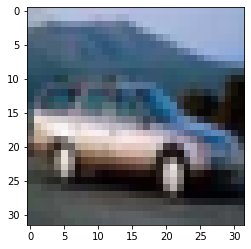

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [34]:
# MODIFY THE CODE TO ADD A VALIDATION SET
validation_count = 2500
train_images = train_images
train_labels = train_labels

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = train_images[:validation_count]
train_images = train_images[validation_count:]

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = train_labels[:validation_count]
train_labels = train_labels[validation_count:]
test_labels = to_categorical(test_labels)

In [35]:
# MAKE WHATEVER CHANGES ARE NECESSARY
# TO GET 0.7 ACCURACY ON THE TEST SET

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3,3), padding='same',strides=2, activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding='same',strides=2, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          73792     
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

In [37]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
epichs = 6
model_hist = model.fit(train_images, train_labels,
                       validation_data=(validation_images,validation_labels),
                        epochs=epichs, batch_size=475)

Train on 47500 samples, validate on 2500 samples
Epoch 1/6
47500/47500 [==============================] - 19s 403us/step - loss: 1.7237 - accuracy: 0.3685 - val_loss: 1.3832 - val_accuracy: 0.4948

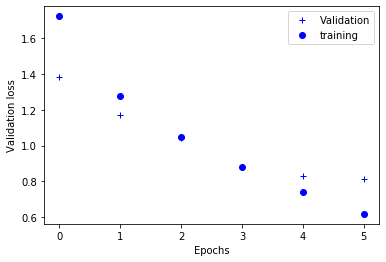

In [38]:
import matplotlib.pyplot as plt

epochs = range(0, epichs)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

10000/10000 [==============================] - 2s 223us/step

0.840535456943512

In [41]:
model.save_weights('./cifar10.h5', overwrite=True)